# Hoja de Trabajo 2 - Segmentación de especies utilizando "Cluster_Analysis"

## Sección 1

Importación de las librerías para realizar el análisis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Generación del data frame "data" para realizar el análisis correspondiente y verificar que se puedan visualizar los datos correctamente.

In [2]:
data = pd.read_csv("iris.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Visualización de la distribución de los datos utilizando seaborn para graficar.

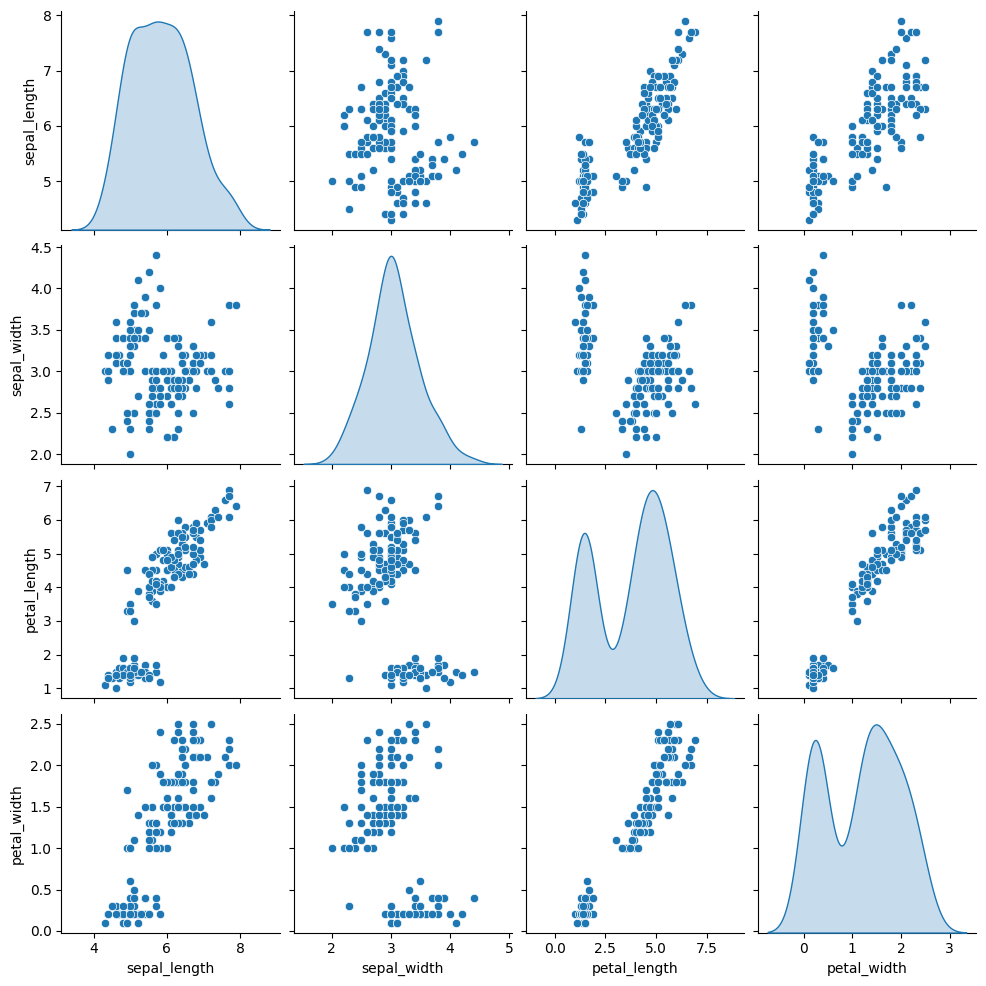

In [3]:
sns.pairplot(data, diag_kind='kde')
plt.show()

Implementación de K-Means con 2 clusters

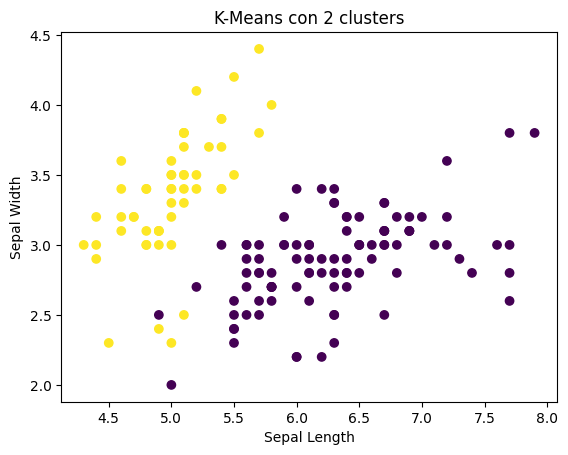

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=50)
data["cluster"] = kmeans.fit_predict(data.iloc[:, :-1])
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data["cluster"], cmap="viridis")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("K-Means con 2 clusters")
plt.show()

Estandarización de los datos y comparación de resultados

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:, :-1])
kmeans_scaled = KMeans(n_clusters=2, random_state=50)
data["cluster_scaled"] = kmeans_scaled.fit_predict(scaled_data)

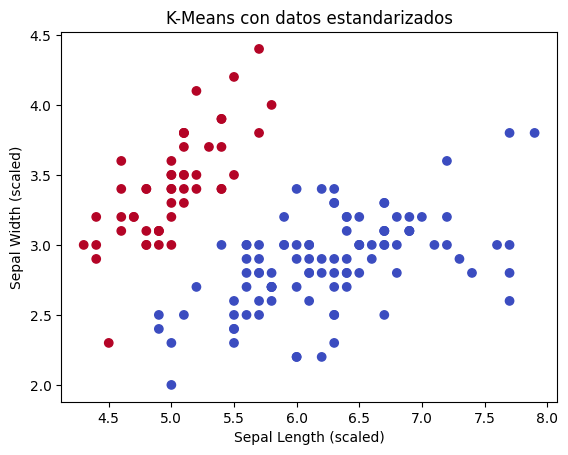

In [15]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data["cluster_scaled"], cmap="coolwarm")
plt.xlabel("Sepal Length (scaled)")
plt.ylabel("Sepal Width (scaled)")
plt.title("K-Means con datos estandarizados")
plt.show()

Se puede observar una diferencia entre los clusters formados entre los datos estandarizados y los datos no estandarizados. Hay pocos puntos que pasaron a ser de un cluster al otro.

## Sección 2

## Sección 3